# Astronomy 2 (PHY1107) - Report Assignment 


### WHAT YOU NEED TO DO:
Use the data provided on the study desk, to create a graph of the observational
H-R diagram for the nearest stars, and for the brightest stars using Excel or a
similar software package. 

You can make one plot for both groups (using different
colours for the groups), or two separate plots (with the same axes ranges). Enter
the data into a worksheet on Excel, and then plot the data points into a scatterplot.

Use the GAIA bp-rp colours for the x-axis, and GAIA absolute Mg magnitude for the y-axis (note the GAIA absolute Mg magnitude requires some computation/data
processing to determine from the provided GAIA apparent g magnitude and the
stellar parallax).

- Make sure to force the y-axis to run backward so that the largest
numbers are on the bottom and the smallest numbers are on the top
(negative ones on the top), since low magnitudes are brighter.
- Please change the ranges of the axes in order to optimise the plot for
comparison between the two groups of stars (i.e. if you plot the two
groups on the same plot then make them different colours to
differentiate them, or if you make two separate plots then make the
axes the same on both plots to allow an easy comparison).

## Plots

### 1.
Create a graph of the observational H-R diagram for the nearest stars.

### 2. 
Create a graph of the observational H-R diagram for the brightest stars.


### Axes
Must be plotted on same axes ranges for comparison.

- **x-axis** = GAIA bp-rp colours
- **y-axis** = GAIA absolute Mg magnitude
  - the GAIA absolute Mg magnitude requires some computation/data
processing to determine from the provided GAIA apparent g magnitude and the
stellar parallax.

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

import math
import numpy as np
import pandas as pd

In [43]:
brightest_df = pd.read_csv('./data/Brightest_stars_GAIA_Report.csv')
nearest_df = pd.read_csv('./data/Nearest_stars_GAIA_Report.csv')

In [17]:
brightest_df

,GAIA_source_id,RA (deg),Dec (deg),parallax,GAIA_g_app_mag,GAIA_bp_rp
0,418551920284673000,10.127242,56.537189,14.090976,1.942524,1.143484
1,4357027756659690000,243.586211,-3.694968,20.411292,2.016425,1.563310
2,4993479684438430000,6.572156,-42.307820,39.918258,2.089977,1.269482
3,4038055447778230000,274.406091,-36.762429,23.885852,2.116495,1.827267
4,1279798794197260000,221.246486,27.074316,13.826673,2.183352,1.184006
...,...,...,...,...,...,...
194,872128538640246000,113.980461,26.895273,12.876057,3.386471,1.817842
195,5537302945910490000,118.054231,-40.575749,8.983793,3.393327,1.263192
196,6801963487915160000,312.955332,-26.919144,5.897469,3.399040,1.850532
197,4871775051598300000,66.009555,-34.016634,11.126967,3.400128,1.686055


We need **Absolute Magnitude (M)**, and we know:

- apparent magnitude (m)
- parallax, in milliarcseconds (mas)

### Equations

Distance modulus:
$$
m - M = 5 log_{10} d - 5
$$

https://www.phys.ksu.edu/personal/wysin/astro/magnitudes.html

$$
\therefore
M = m - 2.5 \log{ \frac{d}{10} * 2 }
$$

Parallax angle $p$, in arcseconds:
$$d = \frac{1}{p}$$

Accounting for `mas` units:
$$
d = \frac{1}{p*10^{-3}}
$$

In [35]:
d = 1 / brightest_df['parallax'] * 10E-3
d

0      0.000710
1      0.000490
2      0.000251
3      0.000419
4      0.000723
         ...   
194    0.000777
195    0.001113
196    0.001696
197    0.000899
198    0.000462
Name: parallax, Length: 199, dtype: float64

In [36]:
m = brightest_df['GAIA_g_app_mag']
M = m - 2.5 * np.log10((d / 10) * 2)
M

0      11.562302
1      12.038526
2      12.840331
3      12.309272
4      11.782572
         ...    
194    12.908354
195    12.524401
196    12.073129
197    12.763495
198    13.489556
Length: 199, dtype: float64

In [44]:
brightest_df['M'] = M
brightest_df

In [89]:
def get_abs_mag(mas_pc, m):
    """
    Calculate Absolute Magnitudes (M), from Apparent 
    Magnitudes and milliparsecs parallax values.
    """
    d = 1 / mas_pc * 10E-3
    return m - 2.5 * np.log10((d / 10) * 2)  

In [106]:
def plot_single(x, y, title):
    """
    Make a scatter plot HR diagram
    """
    plt.figure(figsize=(20,10))

    area = 200
    plt.scatter(x, y, s=area, marker="o")

    plt.title(title, fontsize=30)
    plt.xlabel('GAIA colours ($G_{BP} - G_{RP}$)', fontsize=20)
    plt.ylabel('Absolute Magnitude (M)', fontsize=20)

    plt.xlim([-1,6])
    plt.ylim([8, 36])

    plt.gca().invert_yaxis()

    plt.tick_params(axis='x', labelsize=16)
    plt.tick_params(axis='y', labelsize=16)

In [165]:
def plot_dual(x1, y1, x2, y2,):
    """
    Make a dual scatter plot HR diagram
    """
    fig = plt.figure(figsize=(20,15))
    ax1 = fig.add_subplot(111)

    ax1.scatter(x1, y1, s=150, marker="s", label='Brightest')
    ax1.scatter(x2, y2, s=120, marker="o", label='Nearest')
    plt.legend(loc='lower left', fontsize=20)

    plt.title('Observational H-R diagram of GAIA 200 Nearest and Brightest Stars', fontsize=25)
    plt.xlabel('GAIA colours ($G_{BP} - G_{RP}$)', fontsize=20)
    plt.ylabel('Absolute Magnitude (M)', fontsize=20)

    plt.gca().invert_yaxis()

    plt.tick_params(axis='x', labelsize=16)
    plt.tick_params(axis='y', labelsize=16)



# Get ABS Mags

In [166]:
M_b = get_abs_mag(
    brightest_df['parallax'],
    brightest_df['GAIA_g_app_mag']
)

M_n = get_abs_mag(
    nearest_df['parallax'],
    nearest_df['GAIA_g_app_mag']
)

# Plot both

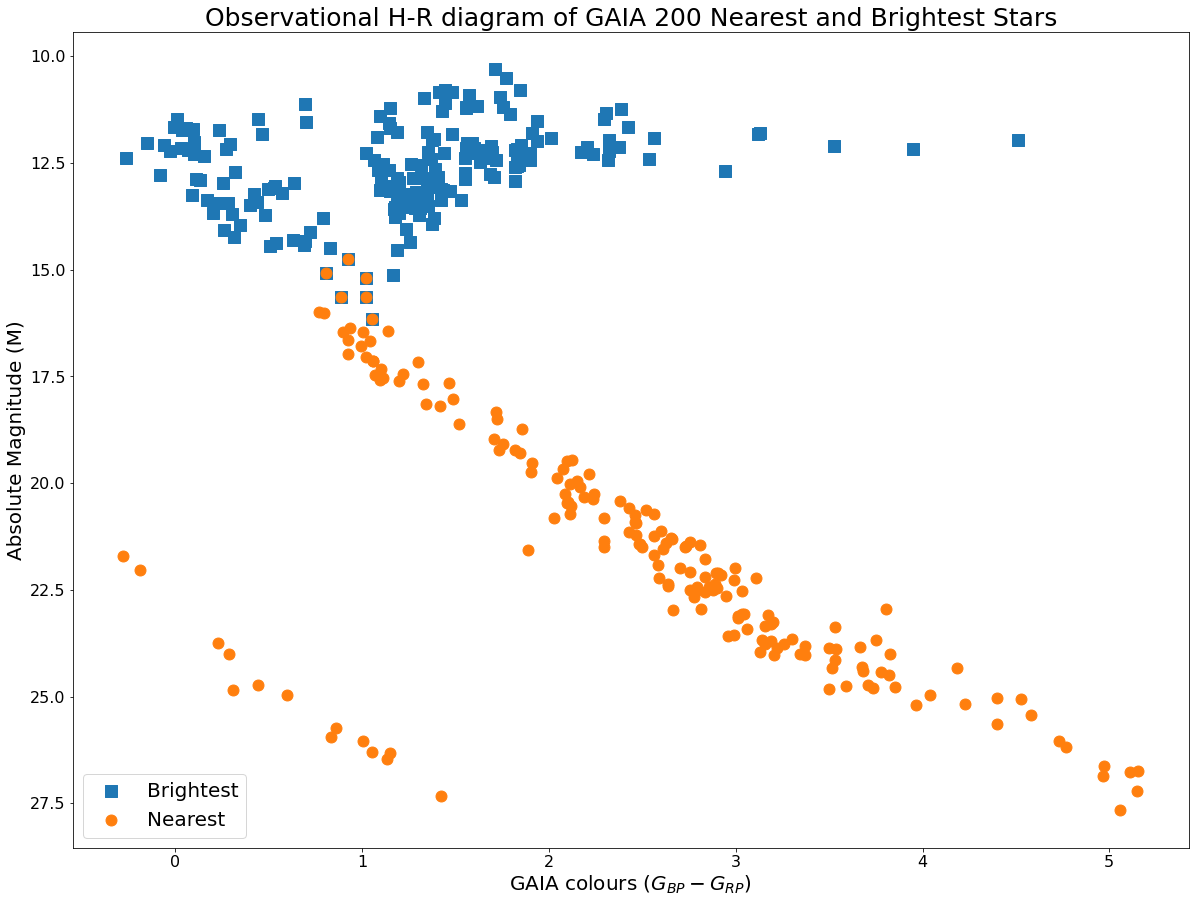

In [167]:
plot_dual(
    brightest_df['GAIA_bp_rp'], 
    M_b,
    nearest_df['GAIA_bp_rp'], 
    M_n
)

## Do Brightest Plot

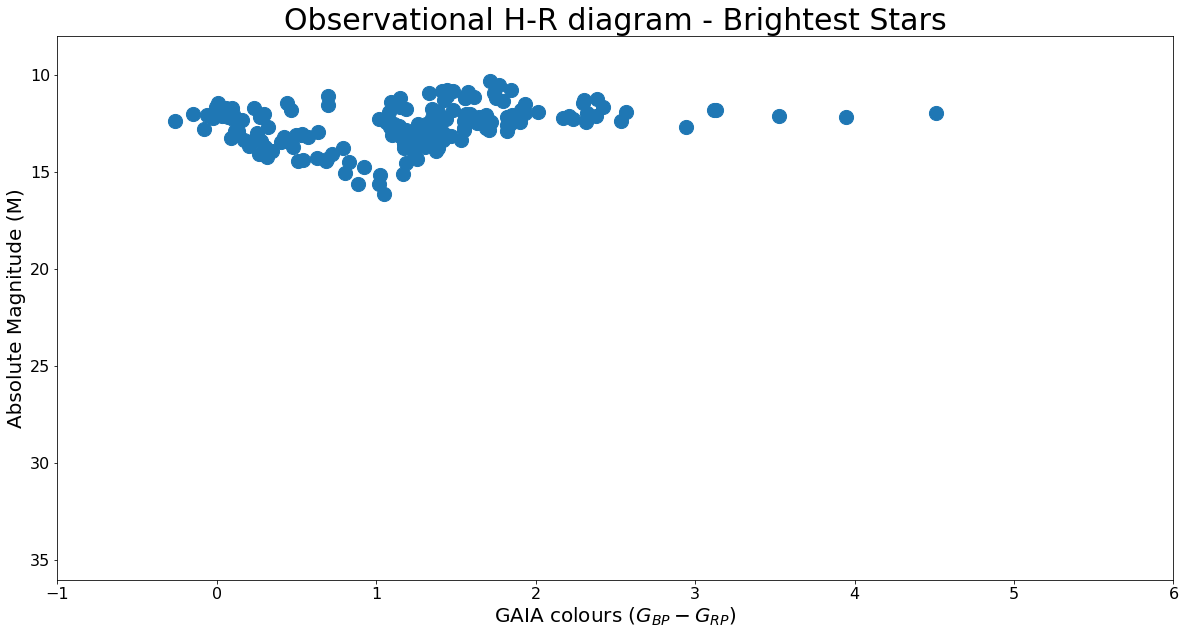

In [107]:
plot_single(
    brightest_df['GAIA_bp_rp'], 
    M_b,
    'Observational H-R diagram - Brightest Stars'
)

## Do Nearest Plot

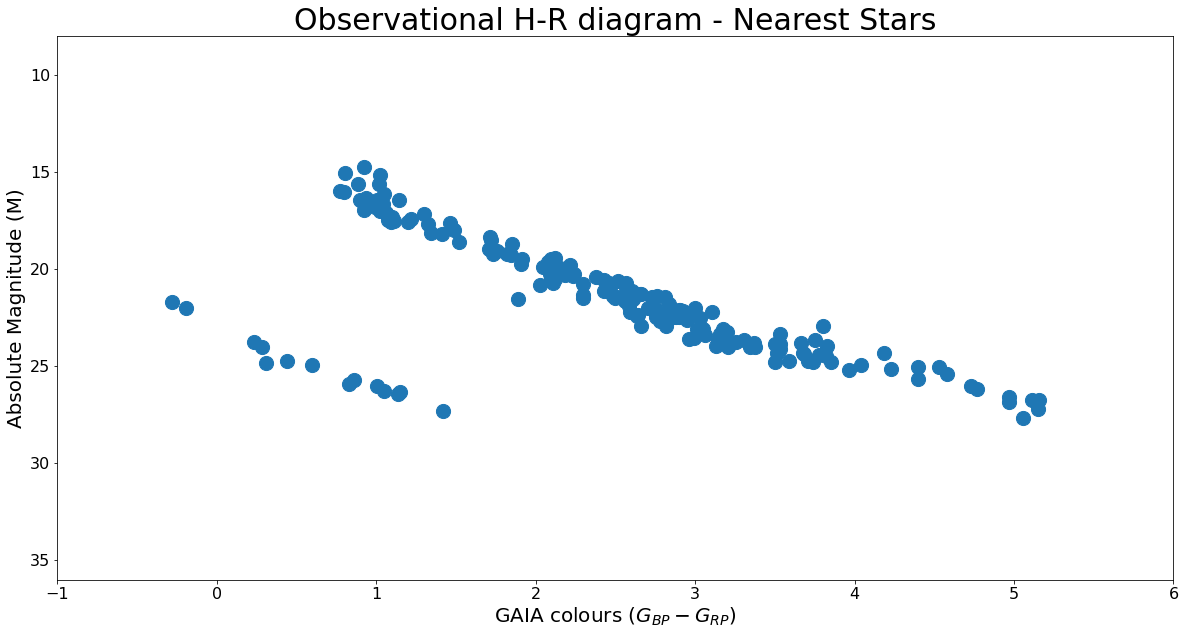

In [109]:
plot_single(
    nearest_df['GAIA_bp_rp'], 
    M_n,
    'Observational H-R diagram - Nearest Stars'
)